# Name : Jay Rambhiya

# Git-Hub Username : jay-rambhiya

# USC ID: #2219880371

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgboost
import warnings
warnings.filterwarnings("ignore")

# 1. Decision Trees as Interpretable Models

# b) Build a decision tree on the whole data set and plot it

In [2]:
data = pd.read_csv('../data/acute+inflammations/diagnosis.data', encoding = 'utf-16', sep = '\t', decimal = ',', header = None)

In [3]:
colNames = ['Temperature of Patient','Occurence of Nausea','Lumbar Pain','Urine Pushing','Micturition Pains','Burning of Urethra, Itch, Swelling of Urethra Outlet','Inflammation of Urinary Bladder','Nephritis of Renal Pelvis Origin']

In [4]:
data.columns = colNames

In [5]:
data

Temperature of Patient Occurence of Nausea Lumbar Pain Urine Pushing  \
0                      35.5                  no         yes            no   
1                      35.9                  no          no           yes   
2                      35.9                  no         yes            no   
3                      36.0                  no          no           yes   
4                      36.0                  no         yes            no   
..                      ...                 ...         ...           ...   
115                    41.4                  no         yes           yes   
116                    41.5                  no          no            no   
117                    41.5                 yes         yes            no   
118                    41.5                  no         yes           yes   
119                    41.5                  no         yes           yes   

    Micturition Pains Burning of Urethra, Itch, Swelling of Urethra Outlet  \
0                  no                                                 no     
1                 yes                                                yes     
2                  no                                                 no     
3                 yes                                                yes     
4                  no                                                 no     
..                ...                                                ...     
115                no                                                yes     
116                no                                                 no     
117               yes                                                 no     
118                no                                                yes     
119                no                                                yes     

    Inflammation of Urinary Bladder Nephritis of Renal Pelvis Origin  
0                                no                               no  
1                               yes                               no  
2                                no                               no  
3                               yes                               no  
4                                no                               no  
..                              ...                              ...  
115                              no                              yes  
116                              no                               no  
117                              no                              yes  
118                              no                              yes  
119                              no                              yes  

[120 rows x 8 columns]

In [6]:
data['Occurence of Nausea'] = data['Occurence of Nausea'].map({'no': 0, 'yes': 1})
data['Lumbar Pain'] = data['Lumbar Pain'].map({'no': 0, 'yes': 1}) 
data['Urine Pushing'] = data['Urine Pushing'].map({'no': 0, 'yes': 1}) 
data['Micturition Pains'] = data['Micturition Pains'].map({'no': 0, 'yes': 1}) 
data['Burning of Urethra, Itch, Swelling of Urethra Outlet'] = data['Burning of Urethra, Itch, Swelling of Urethra Outlet'].map({'no': 0, 'yes': 1}) 
data['Inflammation of Urinary Bladder'] = data['Inflammation of Urinary Bladder'].map({'no': 0, 'yes': 1}) 
data['Nephritis of Renal Pelvis Origin'] = data['Nephritis of Renal Pelvis Origin'].map({'no': 0, 'yes': 1}) 

In [7]:
dataX = data.iloc[:, : -2]
dataY = data.iloc[:, -2 :]

In [8]:
dataX

Temperature of Patient  Occurence of Nausea  Lumbar Pain  Urine Pushing  \
0                      35.5                    0            1              0   
1                      35.9                    0            0              1   
2                      35.9                    0            1              0   
3                      36.0                    0            0              1   
4                      36.0                    0            1              0   
..                      ...                  ...          ...            ...   
115                    41.4                    0            1              1   
116                    41.5                    0            0              0   
117                    41.5                    1            1              0   
118                    41.5                    0            1              1   
119                    41.5                    0            1              1   

     Micturition Pains  Burning of Urethra, Itch, Swelling of Urethra Outlet  
0                    0                                                  0     
1                    1                                                  1     
2                    0                                                  0     
3                    1                                                  1     
4                    0                                                  0     
..                 ...                                                ...     
115                  0                                                  1     
116                  0                                                  0     
117                  1                                                  0     
118                  0                                                  1     
119                  0                                                  1     

[120 rows x 6 columns]

In [9]:
dataY

Inflammation of Urinary Bladder  Nephritis of Renal Pelvis Origin
0                                  0                                 0
1                                  1                                 0
2                                  0                                 0
3                                  1                                 0
4                                  0                                 0
..                               ...                               ...
115                                0                                 1
116                                0                                 0
117                                0                                 1
118                                0                                 1
119                                0                                 1

[120 rows x 2 columns]

In [10]:
decTreeClassifier = DecisionTreeClassifier(criterion = 'entropy')
decTreeClassifier.fit(dataX, dataY)

DecisionTreeClassifier(criterion='entropy')

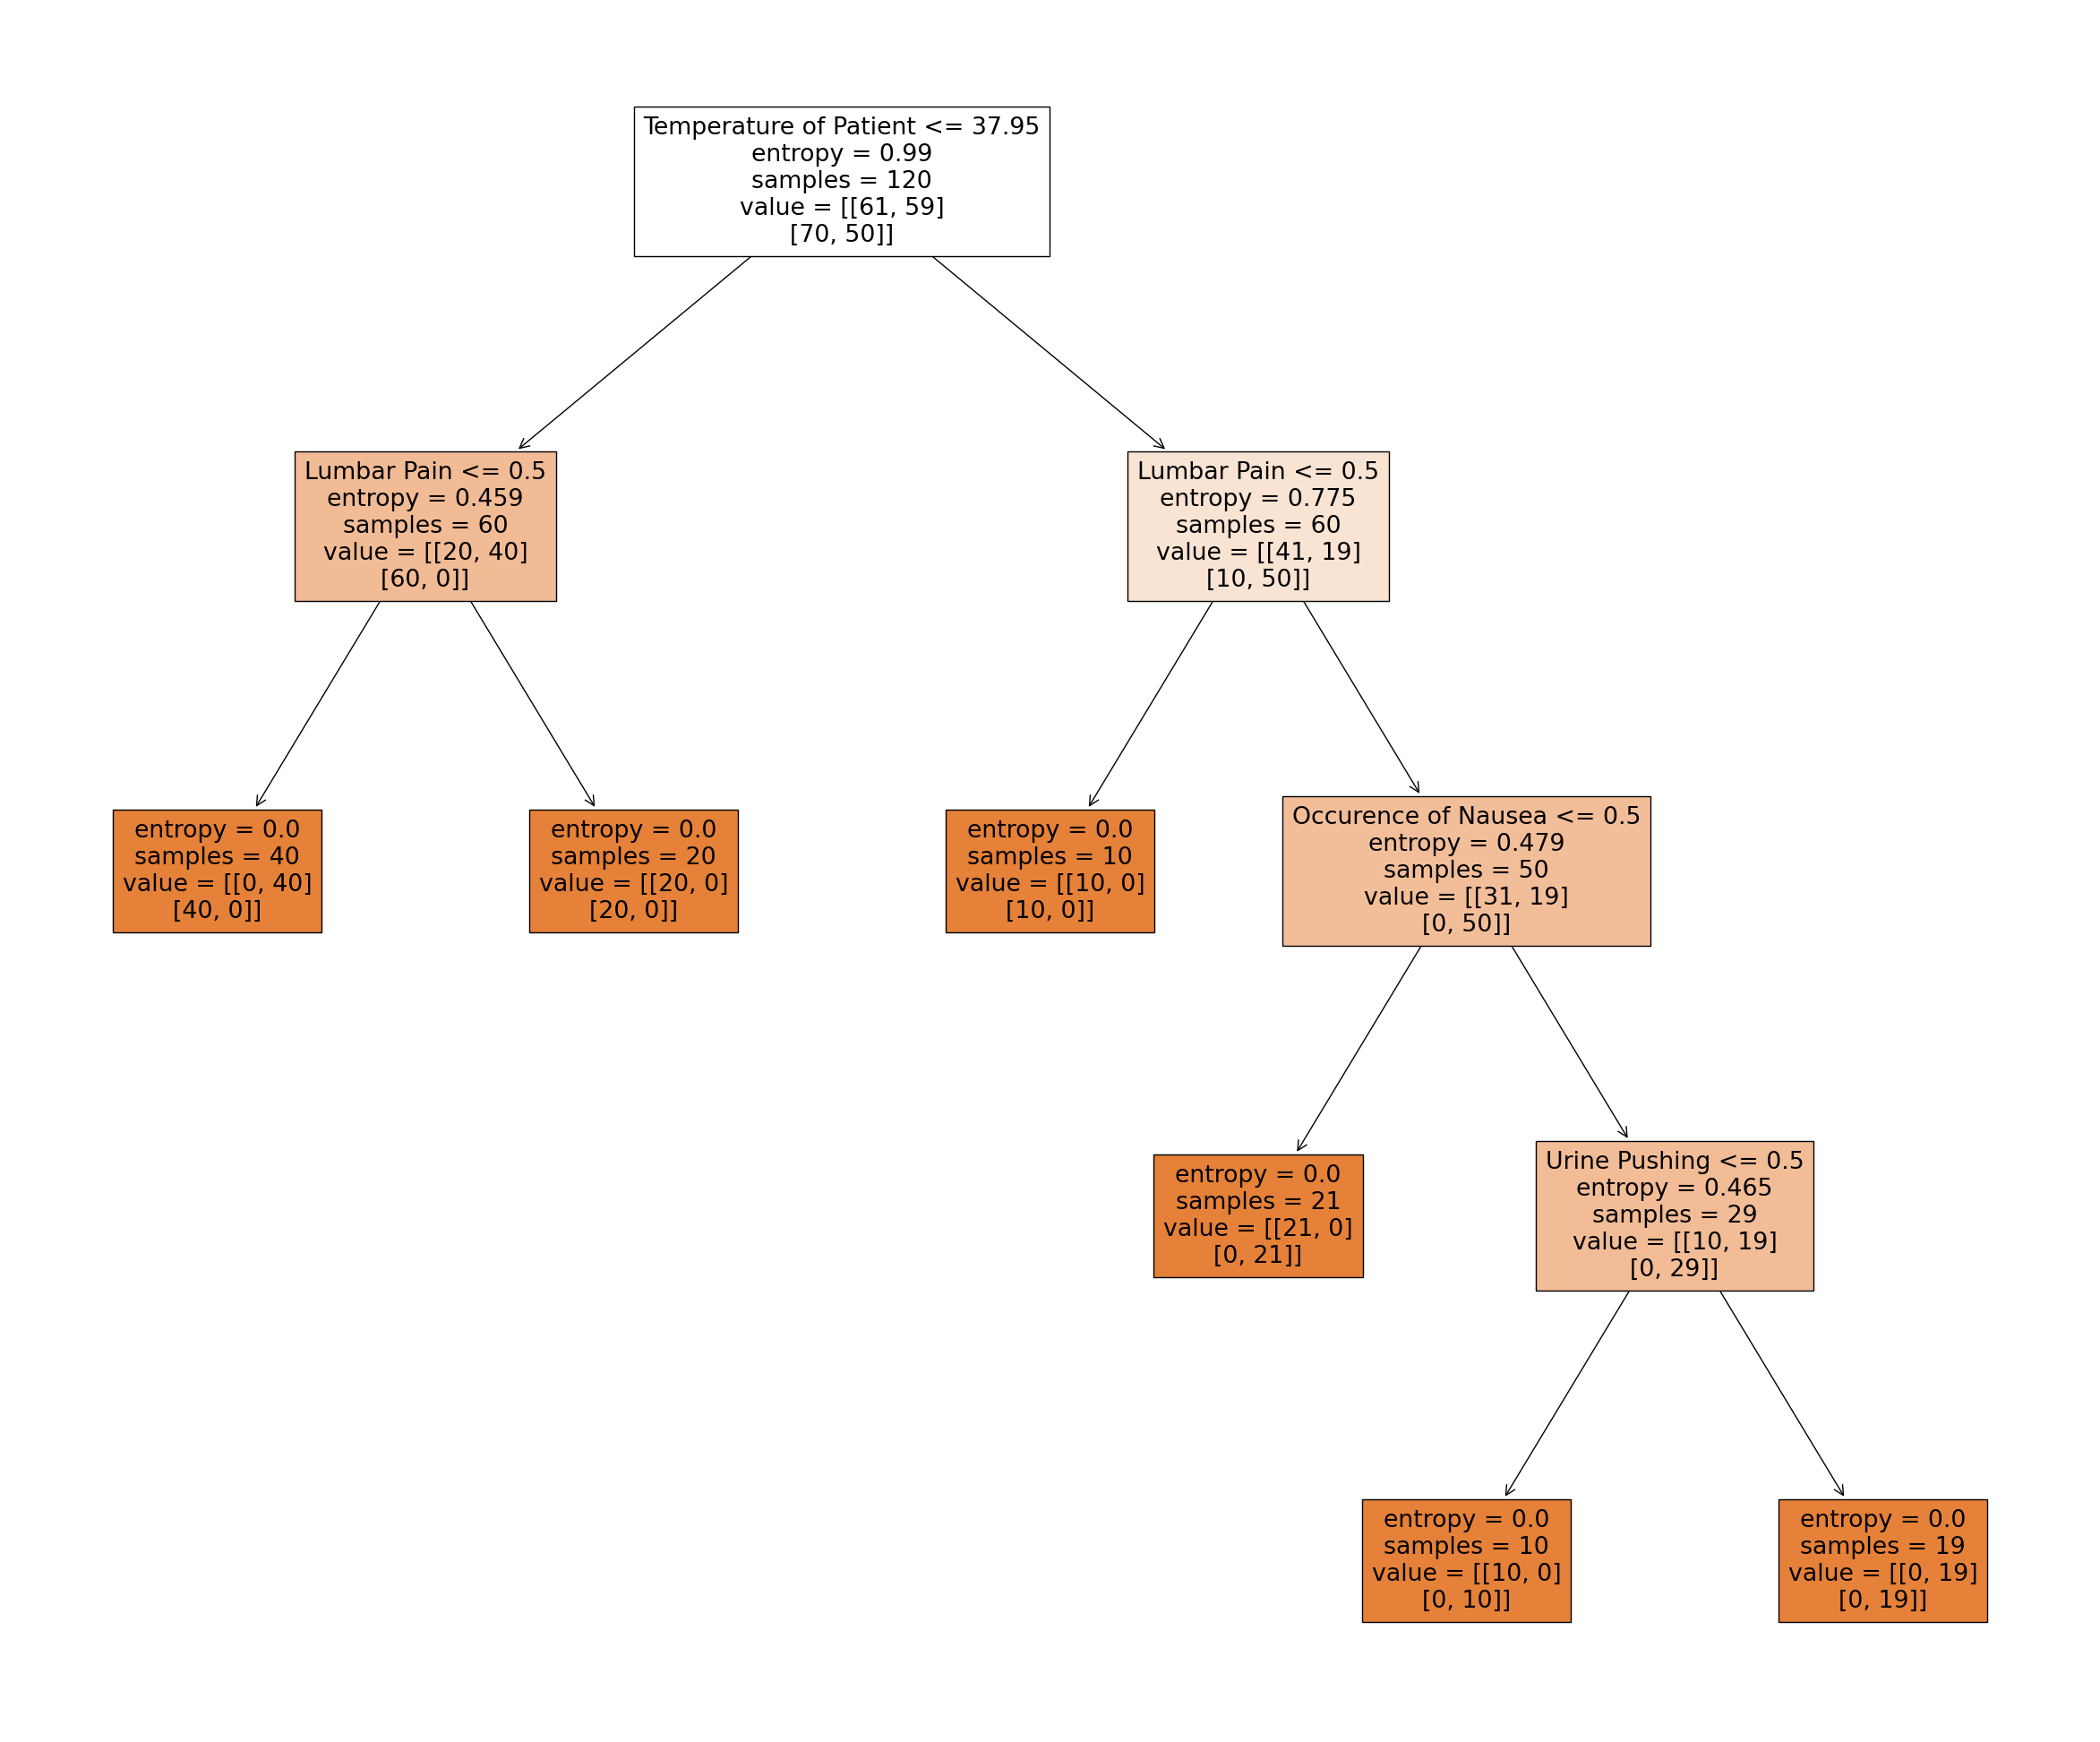

In [11]:
plt.figure(figsize = (30, 25))
treePlot = tree.plot_tree(decTreeClassifier, feature_names = colNames, filled = True)

# (c) Convert the decision rules into a set of IF-THEN rules.

In [12]:
def convertTree(decTree, feats):
    
    decTree_ = decTree.tree_
    featName = [feats[f] if f != _tree.TREE_UNDEFINED else "Undefined" for f in decTree_.feature]
    feats = [f.replace(" ", "_")[:-5] for f in feats]
    
    def recurseForLayer(node, depth):
        indent = "    " * depth
        if decTree_.feature[node] != _tree.TREE_UNDEFINED:
            name = featName[node]
            threshold = decTree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurseForLayer(decTree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurseForLayer(decTree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, decTree_.value[node]))
    recurseForLayer(0, 1)

In [13]:
convertTree(decTreeClassifier, colNames)

    if Temperature of Patient <= 37.95:
        if Lumbar Pain <= 0.5:
            return [[ 0. 40.]
 [40.  0.]]
        else:  # if Lumbar Pain > 0.5
            return [[20.  0.]
 [20.  0.]]
    else:  # if Temperature of Patient > 37.95
        if Lumbar Pain <= 0.5:
            return [[10.  0.]
 [10.  0.]]
        else:  # if Lumbar Pain > 0.5
            if Occurence of Nausea <= 0.5:
                return [[21.  0.]
 [ 0. 21.]]
            else:  # if Occurence of Nausea > 0.5
                if Urine Pushing <= 0.5:
                    return [[10.  0.]
 [ 0. 10.]]
                else:  # if Urine Pushing > 0.5
                    return [[ 0. 19.]
 [ 0. 19.]]


# (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(dataX, dataY, test_size = 0.3, random_state = 36)
decTreeClassifier = DecisionTreeClassifier(random_state = 36)
decTreeClassifier.fit(xTrain, yTrain)
yPredicted = decTreeClassifier.predict(xTest)
print("The test accuracy score is", accuracy_score(yTest, yPredicted))

The test accuracy score is 1.0


In [15]:
pruningPath = decTreeClassifier.cost_complexity_pruning_path(xTrain, yTrain)
alphaList = pruningPath['ccp_alphas']

In [16]:
alphaList

array([0.        , 0.04863946, 0.08821389, 0.1097561 , 0.19723976])

In [17]:
maxScore, maxAlpha = 0, None
for a in alphaList:
    decTreeClassifier = DecisionTreeClassifier(ccp_alpha = a)
    decTreeClassifier.fit(xTrain, yTrain)
    yPredicted = decTreeClassifier.predict(xTest)
    score = accuracy_score(yTest, yPredicted)
    print("The test accuracy when alpha =", a, "is", score)
    if maxScore <= score:
        maxScore = score
        maxAlpha = a

print("\n\nThe alpha with highest test accuraacy is", maxAlpha)

The test accuracy when alpha = 0.0 is 1.0
The test accuracy when alpha = 0.048639455782312935 is 0.8333333333333334
The test accuracy when alpha = 0.08821389020724565 is 0.7777777777777778
The test accuracy when alpha = 0.1097560975609756 is 0.6111111111111112
The test accuracy when alpha = 0.19723976279867217 is 0.2222222222222222


The alpha with highest test accuraacy is 0.0


In [18]:
decTreeClassifier = DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy')
decTreeClassifier.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy')

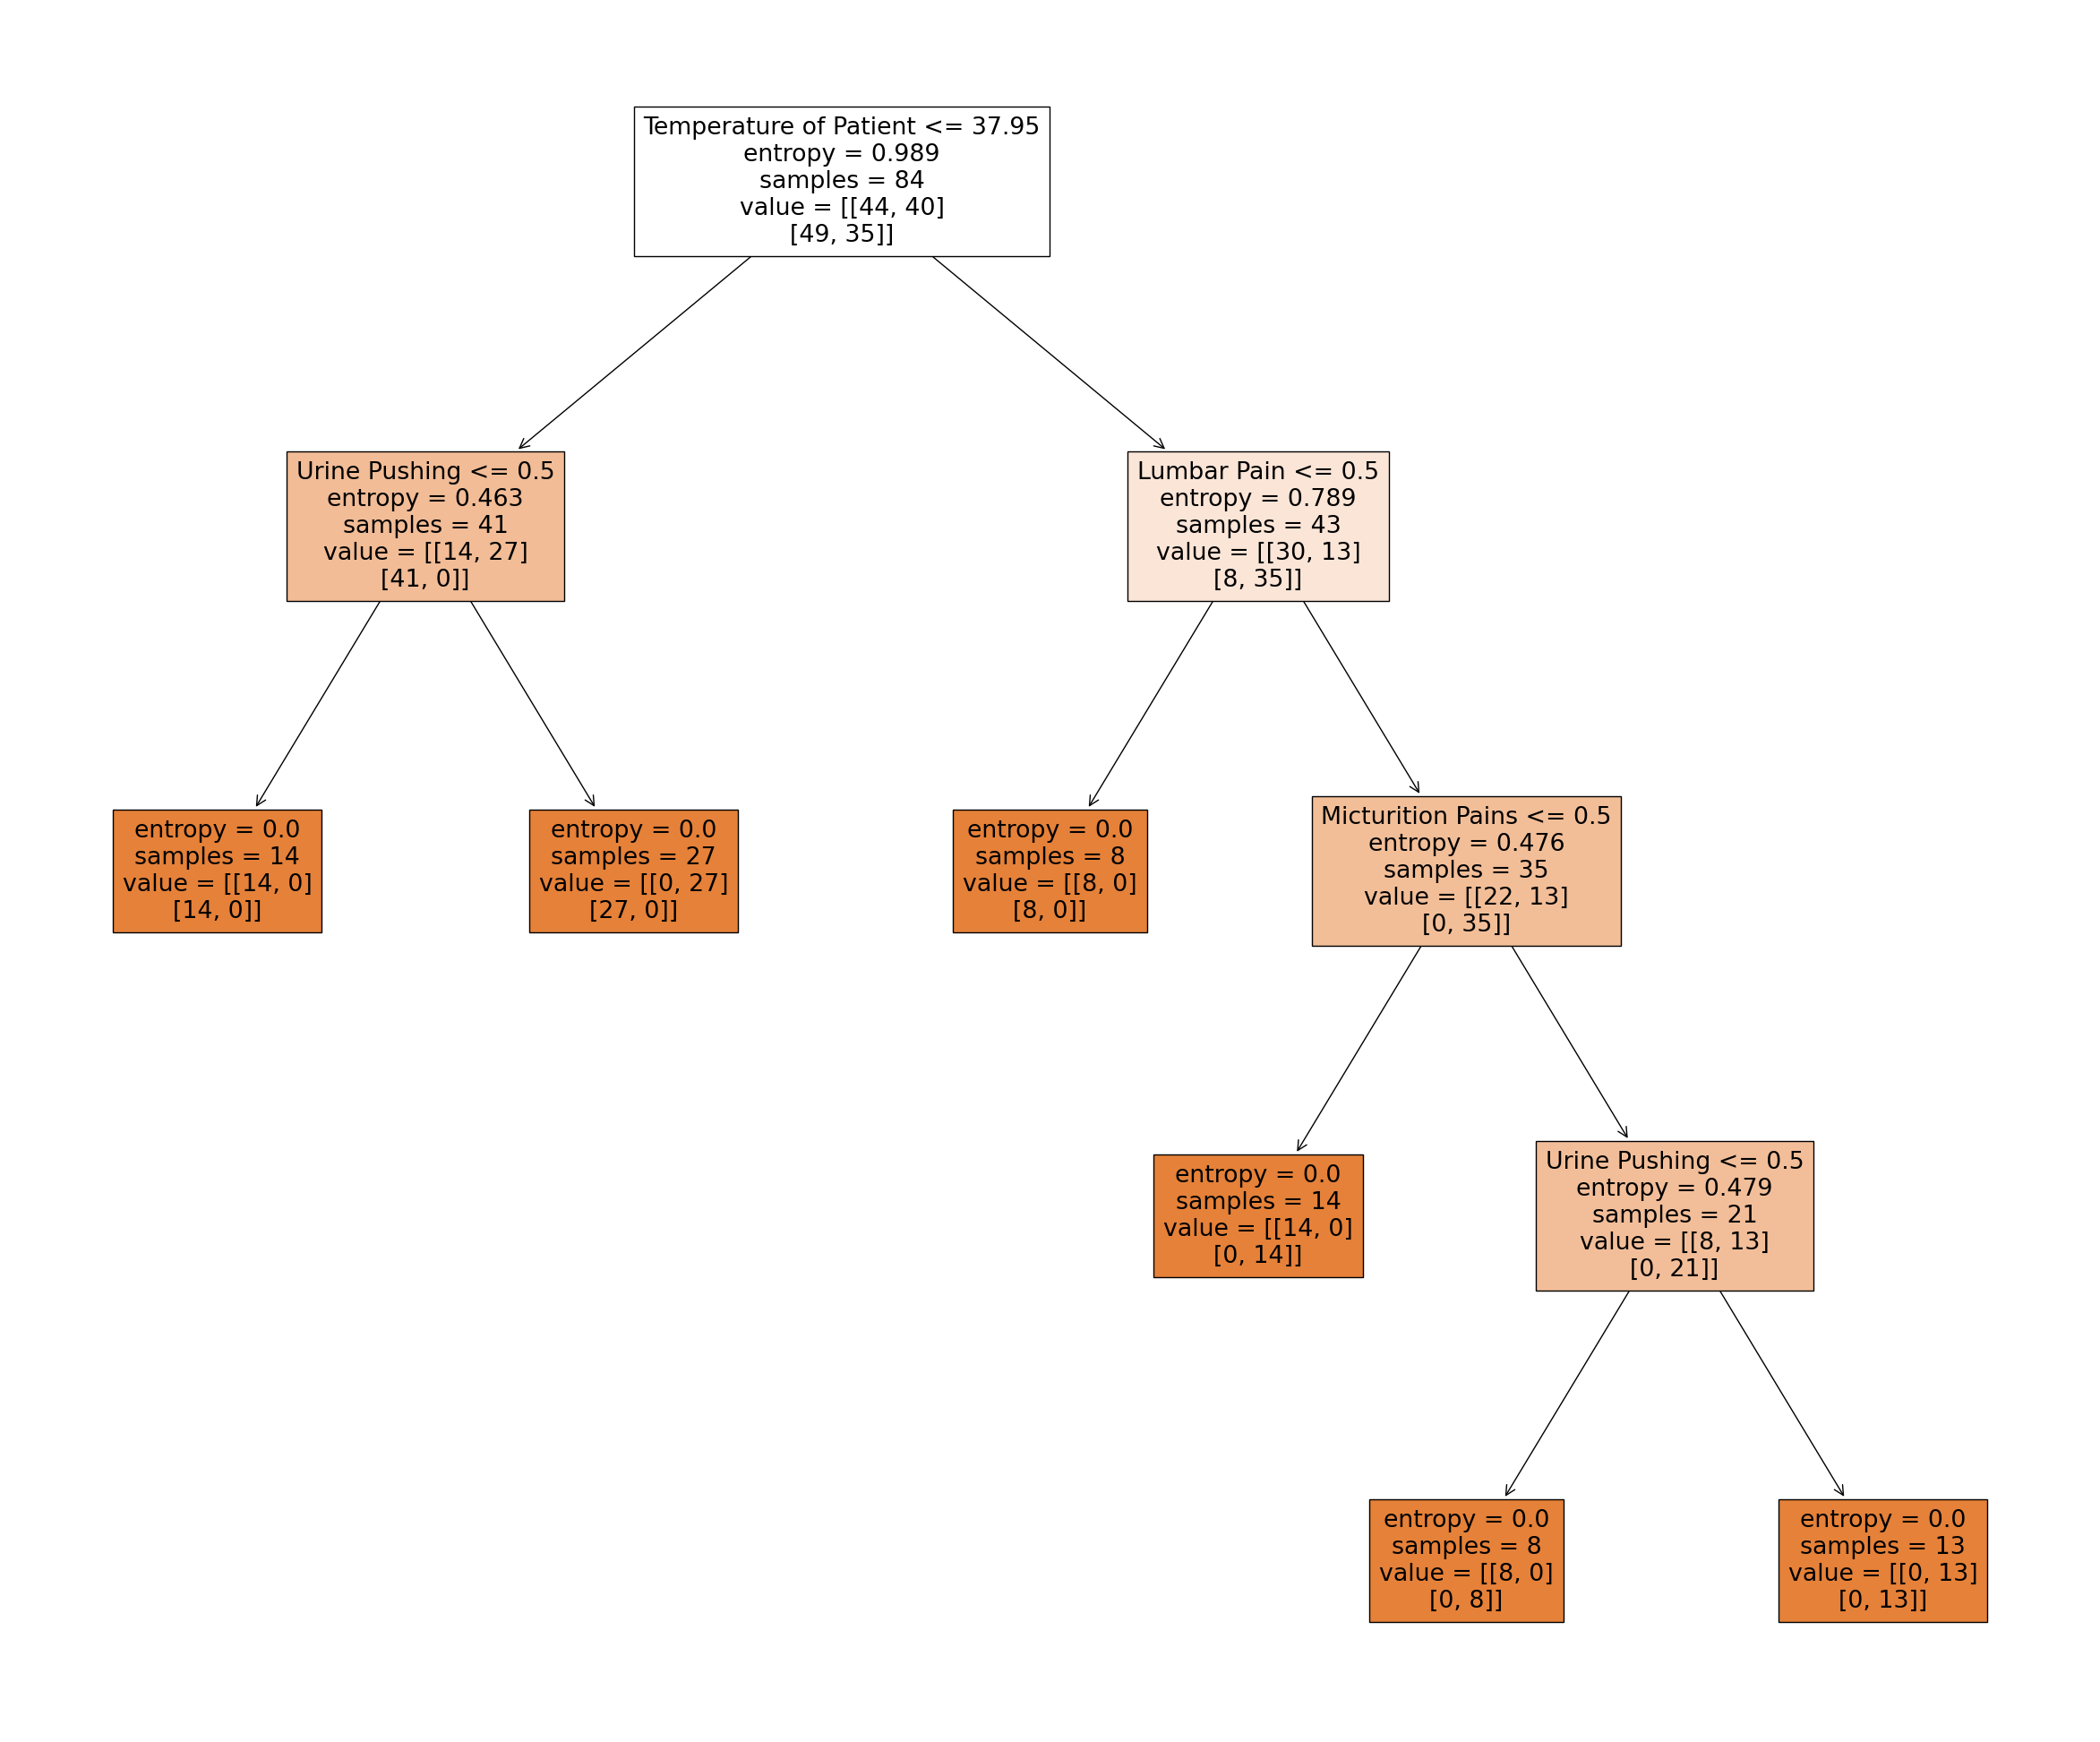

In [19]:
plt.figure(figsize = (30, 25))
treePlot = tree.plot_tree(decTreeClassifier, feature_names = colNames, filled = True)

In [20]:
def convertTree(decTree, feats):
    
    leftChild = decTree.tree_.children_left
    rightChild = decTree.tree_.children_right
    threshold = decTree.tree_.threshold
    feats = [feats[i] for i in decTree.tree_.feature]
    val = decTree.tree_.value
    
    def recurseForLayer(leftChild, rightChild, threshold, features, node, depth = 0):
        
        indent = "    " * depth
        if threshold[node] != -2:
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if leftChild[node] != -1:
                recurseForLayer(leftChild, rightChild, threshold, features, leftChild[node], depth + 1)
                print (indent, "} else {")
                if rightChild[node] != -1:
                    recurseForLayer(leftChild, rightChild, threshold, features, rightChild[node], depth + 1)
                print (indent, "}")
        else:
            print (indent, "return " + str(val[node]))

    recurseForLayer(leftChild, rightChild, threshold, feats, 0)

In [21]:
convertTree(decTreeClassifier, colNames)

 if ( Temperature of Patient <= 37.95000076293945 ) {
     if ( Urine Pushing <= 0.5 ) {
         return [[14.  0.]
 [14.  0.]]
     } else {
         return [[ 0. 27.]
 [27.  0.]]
     }
 } else {
     if ( Lumbar Pain <= 0.5 ) {
         return [[8. 0.]
 [8. 0.]]
     } else {
         if ( Micturition Pains <= 0.5 ) {
             return [[14.  0.]
 [ 0. 14.]]
         } else {
             if ( Urine Pushing <= 0.5 ) {
                 return [[8. 0.]
 [0. 8.]]
             } else {
                 return [[ 0. 13.]
 [ 0. 13.]]
             }
         }
     }
 }


# (2) The LASSO and Boosting for Regression

In [22]:
dataset = pd.read_csv('../data/communities+and+crime/communities.data', header = None)

In [23]:
colNames = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 
    'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 
    'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 
    'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 
    'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 
    'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 
    'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 
    'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 
    'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 
    'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 
    'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 
    'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 
    'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 
    'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 
    'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 
    'PctPolicWhite',  'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 
    'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 
    'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

In [24]:
dataset.columns = colNames

In [25]:
dataset

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [26]:
trainData = dataset.iloc[0:1495, :]
testData = dataset.iloc[1495:, :].reset_index(drop = True)

In [27]:
trainData

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1490      6      ?         ?     Hillsboroughtown     8        0.00   
1491      6      ?         ?           Orangecity     8        0.16   
1492     13      ?         ?         Waycrosscity     8        0.01   
1493     39     85     49056           Mentorcity     8        0.06   
1494     34     17     79610      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22          ?              ?                    ?   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01          ?              ?                    ?   
1493     0.15            0.02          ?              ?                    ?   
1494     1.00            1.00          0           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1490                    ?                 0.00                ?   
1491                  0.5                 0.61             0.19   
1492                    ?                 0.00                ?   
1493                    ?                 0.00                ?   
1494                    0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

In [28]:
testData

state county community      communityname  fold  population  \
0        6      ?         ?     MillValleycity     8        0.00   
1       48      ?         ?        LiveOakcity     8        0.00   
2       35      ?         ?       Portalescity     8        0.00   
3       42     17     25112      Fallstownship     8        0.04   
4       51    683     48952       Manassascity     8        0.03   
..     ...    ...       ...                ...   ...         ...   
494     12      ?         ?  TempleTerracecity    10        0.01   
495      6      ?         ?        Seasidecity    10        0.05   
496      9      9     80070      Waterburytown    10        0.16   
497     25     17     72600        Walthamcity    10        0.08   
498      6      ?         ?        Ontariocity    10        0.20   

     householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0             0.20          0.03          0.91          0.23  ...      0.01   
1             0.55          0.13          0.78          0.15  ...      0.01   
2             0.52          0.04          0.59          0.05  ...      0.01   
3             0.51          0.07          0.92          0.09  ...      0.06   
4             0.59          0.20          0.75          0.19  ...      0.03   
..             ...           ...           ...           ...  ...       ...   
494           0.40          0.10          0.87          0.12  ...      0.01   
495           0.96          0.46          0.28          0.83  ...      0.02   
496           0.37          0.25          0.69          0.04  ...      0.08   
497           0.51          0.06          0.87          0.22  ...      0.03   
498           0.78          0.14          0.46          0.24  ...      0.11   

     PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0       0.23            0.73          ?              ?                    ?   
1       0.18            0.02          ?              ?                    ?   
2       0.18            0.00          ?              ?                    ?   
3       0.13            0.16          ?              ?                    ?   
4       0.23            0.06          ?              ?                    ?   
..       ...             ...        ...            ...                  ...   
494     0.28            0.05          ?              ?                    ?   
495     0.37            0.20          ?              ?                    ?   
496     0.32            0.18       0.08           0.06                 0.78   
497     0.38            0.33       0.02           0.02                 0.79   
498     0.30            0.05       0.08           0.04                 0.73   

     LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                      ?                 0.00                ?   
1                      ?                 0.00                ?   
2                      ?                 0.00                ?   
3                      ?                 0.00                ?   
4                      ?                 0.00                ?   
..                   ...                  ...              ...   
494                    ?                 0.00                ?   
495                    ?                 0.00                ?   
496                    0                 0.91             0.28   
497                    0                 0.22             0.18   
498                  0.5                 1.00             0.13   

     ViolentCrimesPerPop  
0                   0.12  
1                   0.11  
2                   0.12  
3                   0.06  
4                   0.12  
..                   ...  
494                 0.09  
495                 0.45  
496                 0.23  
497                 0.19  
498                 0.48  

[499 rows x 128 columns]

# (b)Use a data imputation technique to deal with the missing values in the data set. 

In [29]:
testData = testData.iloc[:, 5:]
trainData = trainData.iloc[:, 5:]

In [30]:
trainData = trainData.replace('?', np.NaN)
testData = testData.replace('?', np.NaN)

In [31]:
dataImputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
dataImputer = dataImputer.fit(trainData)

In [32]:
trainData.iloc[:, :] = dataImputer.transform(trainData)
trainData

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22   0.163975       0.080502   
1491      0.07     0.40            0.14       0.07           0.05   
1492      0.03     0.12            0.01   0.163975       0.080502   
1493      0.08     0.15            0.02   0.163975       0.080502   
1494      0.00     1.00            1.00        0.0           0.01   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     0.9                  0.5                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1490             0.713054             0.451883                 0.00   
1491                 0.85                  0.5                 0.61   
1492             0.713054             0.451883                 0.00   
1493             0.713054             0.451883                 0.00   
1494                 0.77                  0.0                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1490         0.190753                 0.03  
1491             0.19                 0.20  
1492         0.190753                 0.30  
1493         0.190753   

In [33]:
testData.iloc[:, :] = dataImputer.transform(testData)
testData

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          0.00           0.20          0.03          0.91          0.23   
1          0.00           0.55          0.13          0.78          0.15   
2          0.00           0.52          0.04          0.59          0.05   
3          0.04           0.51          0.07          0.92          0.09   
4          0.03           0.59          0.20          0.75          0.19   
..          ...            ...           ...           ...           ...   
494        0.01           0.40          0.10          0.87          0.12   
495        0.05           0.96          0.46          0.28          0.83   
496        0.16           0.37          0.25          0.69          0.04   
497        0.08           0.51          0.06          0.87          0.22   
498        0.20           0.78          0.14          0.46          0.24   

     racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0           0.05         0.15         0.19         0.09        0.42  ...   
1           0.36         0.48         0.53         0.30        0.10  ...   
2           0.62         0.84         0.78         0.75        0.43  ...   
3           0.03         0.38         0.47         0.27        0.35  ...   
4           0.10         0.38         0.62         0.35        0.11  ...   
..           ...          ...          ...          ...         ...  ...   
494         0.16         0.43         0.51         0.35        0.30  ...   
495         0.32         0.69         0.86         0.73        0.14  ...   
496         0.25         0.35         0.50         0.31        0.54  ...   
497         0.10         0.58         0.74         0.63        0.41  ...   
498         0.77         0.50         0.62         0.40        0.17  ...   

     LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0        0.01     0.23            0.73   0.163975       0.080502   
1        0.01     0.18            0.02   0.163975       0.080502   
2        0.01     0.18            0.00   0.163975       0.080502   
3        0.06     0.13            0.16   0.163975       0.080502   
4        0.03     0.23            0.06   0.163975       0.080502   
..        ...      ...             ...        ...            ...   
494      0.01     0.28            0.05   0.163975       0.080502   
495      0.02     0.37            0.20   0.163975       0.080502   
496      0.08     0.32            0.18       0.08           0.06   
497      0.03     0.38            0.33       0.02           0.02   
498      0.11     0.30            0.05       0.08           0.04   

     LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0               0.713054             0.451883                 0.00   
1               0.713054             0.451883                 0.00   
2               0.713054             0.451883                 0.00   
3               0.713054             0.451883                 0.00   
4               0.713054             0.451883                 0.00   
..                   ...                  ...                  ...   
494             0.713054             0.451883                 0.00   
495             0.713054             0.451883                 0.00   
496                 0.78                  0.0                 0.91   
497                 0.79                  0.0                 0.22   
498                 0.73                  0.5                 1.00   

     PolicBudgPerPop  ViolentCrimesPerPop  
0           0.190753                 0.12  
1           0.190753                 0.11  
2           0.190753                 0.12  
3           0.190753                 0.06  
4           0.190753                 0.12  
..               ...                  ...  
494         0.190753                 0.09  
495         0.190753                 0.45  
496             0.28                 0.23  
497             0.18                 0.19  
498             0.13                 

In [34]:
data = pd.concat([trainData, testData], ignore_index = True)

# (c) Plot a correlation matrix for the features in the data set.

In [35]:
corrMat = data.corr()
corrMat.style.background_gradient(cmap='coolwarm')

# (d) Calculate the Coefficient of Variation CV for each feature

In [36]:
features = colNames[5:]
response = [colNames[-1]]
features

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEng

In [37]:
newData = data.replace('?', np.NaN)
#newData = newData.iloc[:, 5:]
dataImputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
dataImputer = dataImputer.fit(newData)
newData.iloc[:, :] = dataImputer.transform(newData)
dataX = newData.iloc[:, :-1]
dataX

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0                 0.29      0.12     0.26            0.20       0.06   
1             0.323598      0.02     0.12            0.45   0.163975   
2             0.323598      0.01     0.21            0.02   0.163975   
3             0.323598      0.02     0.39            0.28   0.163975   
4             0.323598      0.04     0.09            0.02   0.163975   
...                ...       ...      ...             ...        ...   
1989          0.323598      0.01     0.28            0.05   0.163975   
1990          0.323598      0.02     0.37            0.20   0.163975   
1991              0.25      0.08     0.32            0.18       0.08   
1992              0.19      0.03     0.38            0.33       0.02   
1993              0.11      0.11     0.30            0.05       0.08   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0              0.04                  0.9                  0.5   
1          0.080502             0.713054             0.451883   
2          0.080502             0.713054             0.451883   
3          0.080502             0.713054             0.451883   
4          0.080502             0.713054             0.451883   
...             ...                  ...                  ...   
1989       0.080502             0.713054             0.451883   
1990       0.080502             0.713054             0.451883   
1991           0.06                 0.78                  0.0   
1992           0.02                 0.79                  0.0   
1993           0.04                 0.73                  0.5   

      LemasPctOfficDrugUn  PolicBudgPerPop  
0                    0.32             0.14  
1                    0.00         0.190753  
2                    0.00         0.190753  
3                    0.00         0.190753  
4                    0.00         0.190753  
...                   ...              ...  
1989                 0.00         0.190753  
1990                 0.00         0.190753  
1991                 0.91             0.28  
1992                 0.22             0.18  
1993           

In [38]:
coeffList = []
for i in features:
    d = data[i]
    sd = d.std()
    mn = d.mean()
    coeffList.append([i, round(sd / mn, 3)])
print(tabulate(coeffList, headers = ['Features', 'Coefficient of Validation(CV)'],tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════════════════════════╕
│ Features              │   Coefficient of Validation(CV) │
╞═══════════════════════╪═════════════════════════════════╡
│ population            │                           2.204 │
├───────────────────────┼─────────────────────────────────┤
│ householdsize         │                           0.353 │
├───────────────────────┼─────────────────────────────────┤
│ racepctblack          │                           1.411 │
├───────────────────────┼─────────────────────────────────┤
│ racePctWhite          │                           0.324 │
├───────────────────────┼─────────────────────────────────┤
│ racePctAsian          │                           1.359 │
├───────────────────────┼─────────────────────────────────┤
│ racePctHisp           │                           1.614 │
├───────────────────────┼─────────────────────────────────┤
│ agePct12t21           │                           0.366 │
├───────────────────────┼───────────────

# (e)make scatter plots and box plots for features with highest CV. 

In [39]:
coeffList.sort(key = lambda x : x[1], reverse = True)
coeffList

[['NumStreet', 4.408],
 ['NumInShelters', 3.485],
 ['NumIlleg', 2.994],
 ['NumImmig', 2.9],
 ['LemasPctOfficDrugUn', 2.555],
 ['NumUnderPov', 2.305],
 ['population', 2.204],
 ['numbUrban', 2.002],
 ['HousVacant', 1.959],
 ['LandArea', 1.678],
 ['racePctHisp', 1.614],
 ['PctNotSpeakEnglWell', 1.459],
 ['PctUsePubTrans', 1.417],
 ['racepctblack', 1.411],
 ['racePctAsian', 1.359],
 ['PctRecentImmig', 1.3],
 ['PctRecImmig5', 1.298],
 ['PctRecImmig10', 1.284],
 ['PctRecImmig8', 1.281],
 ['PctPersDenseHous', 1.127],
 ['PctForeignBorn', 1.072],
 ['PctVacantBoarded', 1.065],
 ['ViolentCrimesPerPop', 0.979],
 ['PctIlleg', 0.92],
 ['PctHousNoPhone', 0.918],
 ['OwnOccMedVal', 0.879],
 ['PctPolicAsian', 0.876],
 ['OwnOccHiQuart', 0.875],
 ['PopDens', 0.872],
 ['PctWOFullPlumb', 0.849],
 ['OwnOccLowQuart', 0.848],
 ['MedNumBR', 0.811],
 ['indianPerCap', 0.81],
 ['PctLargHouseOccup', 0.757],
 ['PctPopUnderPov', 0.754],
 ['LemasSwornFT', 0.747],
 ['PctLargHouseFam', 0.735],
 ['PolicOperBudg', 0.701],

In [40]:
requiredFeatures, i = [], 0
while(i < round(math.sqrt(128))):
    requiredFeatures.append(coeffList[i][0])
    i += 1
requiredFeatures

['NumStreet',
 'NumInShelters',
 'NumIlleg',
 'NumImmig',
 'LemasPctOfficDrugUn',
 'NumUnderPov',
 'population',
 'numbUrban',
 'HousVacant',
 'LandArea',
 'racePctHisp']

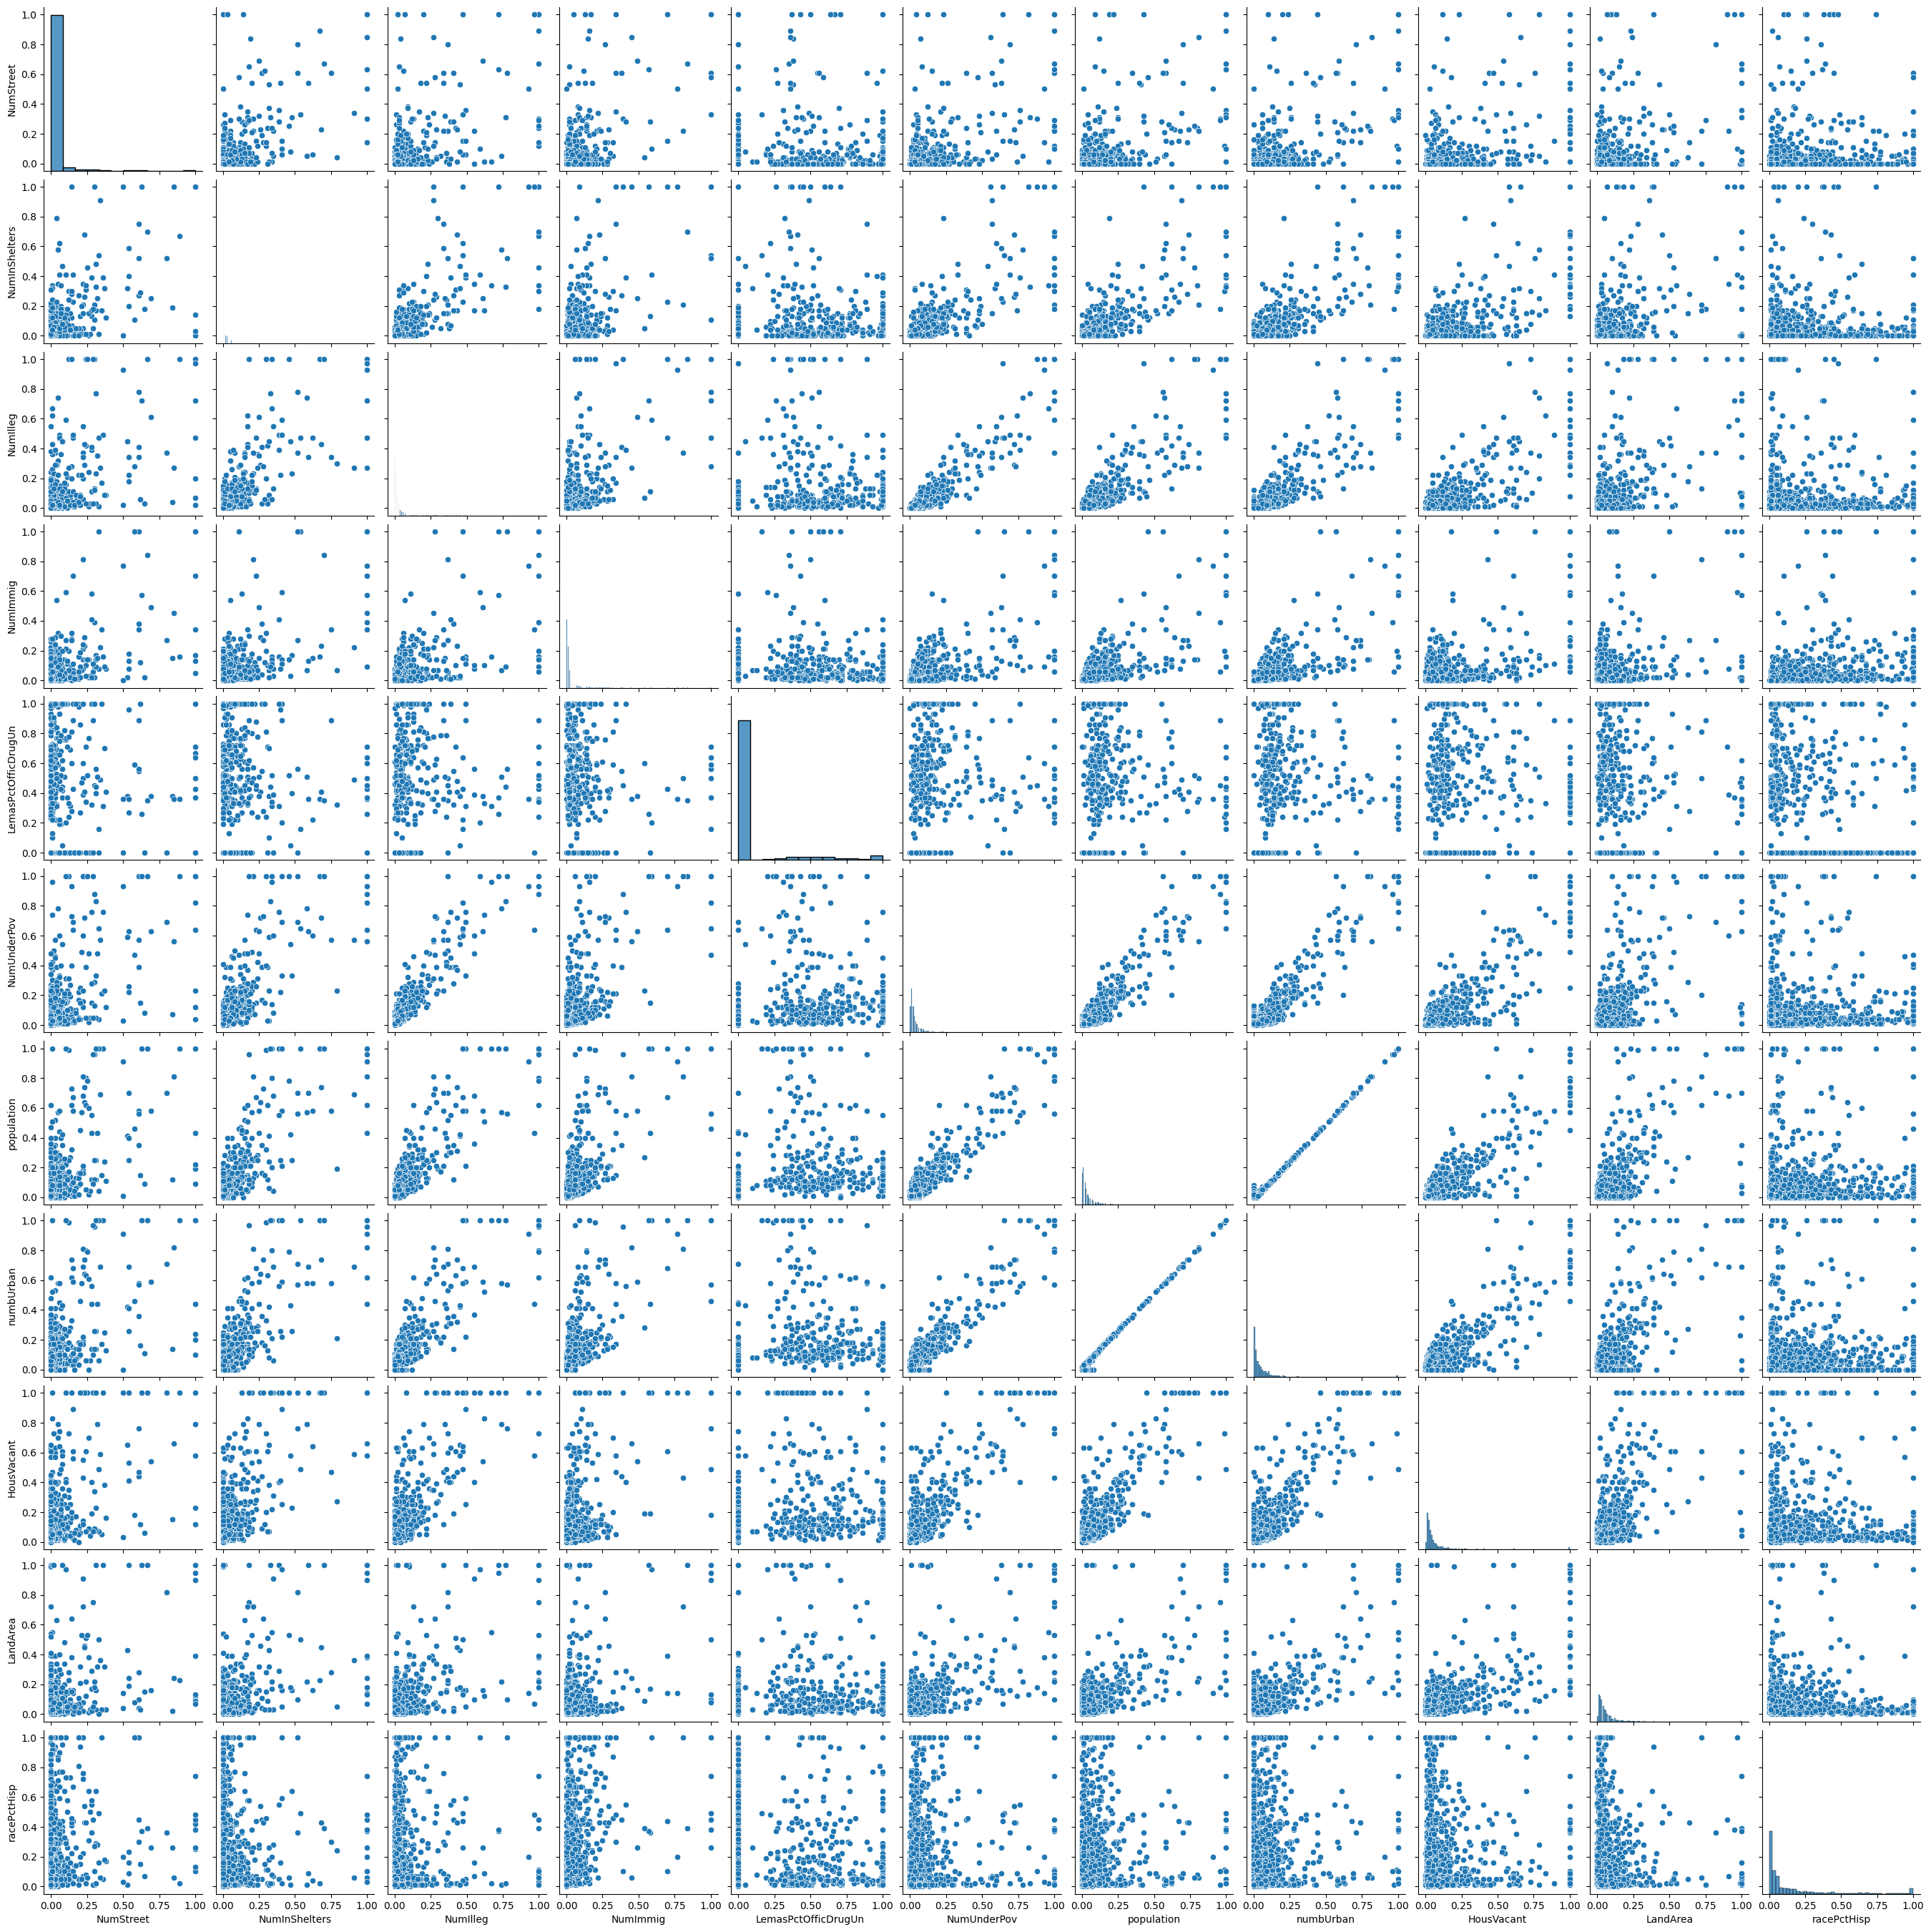

In [41]:
requiredData = data[requiredFeatures]
sns.pairplot(requiredData,palette = 'husl')

<Axes: >

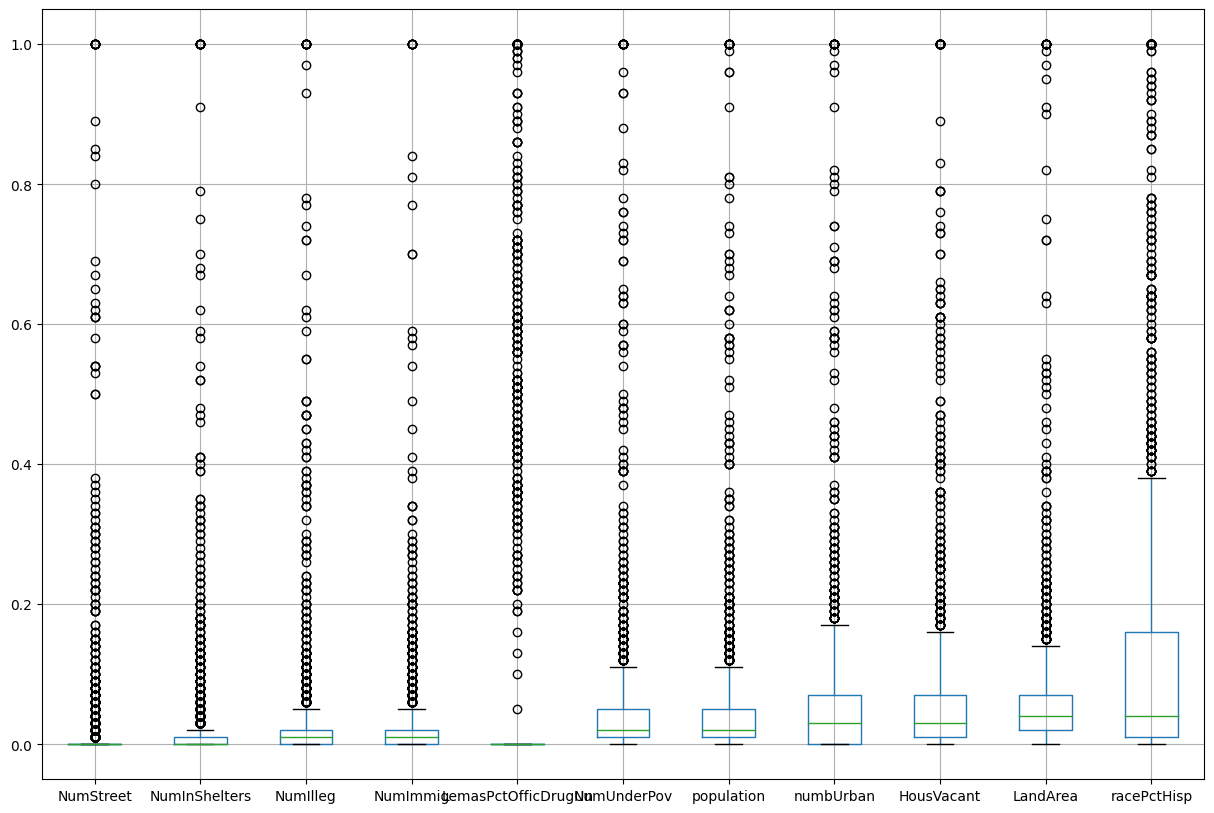

In [42]:
requiredData.boxplot(figsize = (15, 10))

# (f) Fit a linear model using least squares to the training set and report the test error.

In [43]:
xTrain = trainData.iloc[:, :-1]
yTrain = trainData.loc[:, 'ViolentCrimesPerPop']
xTest = testData.iloc[:, :-1]
yTest = testData.loc[:, 'ViolentCrimesPerPop']

In [44]:
linRegModel = LinearRegression()
linRegModel = linRegModel.fit(xTrain, yTrain)
yPredictions = linRegModel.predict(xTest)
print('The mean squared error is:', mean_squared_error(yTest, yPredictions))

The mean squared error is: 1.809991834183255e+16


# g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.

In [45]:
ridgeModel = RidgeCV(alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4], cv = 5)
ridgeModel = ridgeModel.fit(xTrain, yTrain)
selectedAlpha = ridgeModel.alpha_
yPredicted = ridgeModel.predict(xTest)

print("The selected alpha is:", selectedAlpha)
print("Accuracy score:", ridgeModel.score(xTest, yTest))
print("Mean squared error for ridge regression:", mean_squared_error(yTest, yPredicted))

The selected alpha is: 1.0
Accuracy score: 0.6271188537091104
Mean squared error for ridge regression: 0.017732474992896645


# (h) Fit a LASSO model on the training set, with λ chosen by cross-validation.

In [46]:
lassoModel = LassoCV(alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4], cv = 10)
lassoModel = lassoModel.fit(xTrain, yTrain)
selectedAlpha = lassoModel.alpha_
yPredicted = lassoModel.predict(xTest)

print("The selected alpha is:", selectedAlpha)
print("Accuracy score:", lassoModel.score(xTest, yTest))
print("Mean squared error for lasso regression:", mean_squared_error(yTest, yPredicted))

The selected alpha is: 0.0001
Accuracy score: 0.6259914394030223
Mean squared error for lasso regression: 0.01778608951910212


In [47]:
coefficients = np.abs(lassoModel.coef_)
coefficients

array([0.        , 0.        , 0.27305204, 0.        , 0.01798214,
       0.        , 0.07600145, 0.29112509, 0.        , 0.00387318,
       0.        , 0.04099461, 0.        , 0.09316409, 0.02905821,
       0.11005721, 0.0592378 , 0.04182285, 0.10979718, 0.        ,
       0.        , 0.06946044, 0.02254008, 0.03194572, 0.02923882,
       0.02361888, 0.02570896, 0.        , 0.15012476, 0.02130049,
       0.        , 0.01731481, 0.        , 0.1550098 , 0.01919701,
       0.        , 0.01649189, 0.        , 0.13263026, 0.15069238,
       0.0955719 , 0.        , 0.        , 0.        , 0.19812839,
       0.03596962, 0.01153443, 0.        , 0.13465667, 0.06233463,
       0.09557897, 0.08115944, 0.        , 0.        , 0.        ,
       0.00562052, 0.        , 0.        , 0.        , 0.03926042,
       0.        , 0.08081295, 0.        , 0.08945576, 0.07330746,
       0.        , 0.        , 0.06435704, 0.23109236, 0.06485728,
       0.00596287, 0.13029953, 0.0595294 , 0.        , 0.07468

In [48]:
selectedFeatures = []
for i, c in enumerate(coefficients):
    if c != 0:
        selectedFeatures.append(features[i])
selectedFeatures

['racepctblack',
 'racePctAsian',
 'agePct12t21',
 'agePct12t29',
 'agePct65up',
 'pctUrban',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctBSorMore',
 'PctEmploy',
 'PctEmplManu',
 'PctOccupManu',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRec10',
 'PctRecImmig10',
 'PctNotSpeakEnglWell',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'PctHousLess3BR',
 'MedNumBR',
 'HousVacant',
 'PctHousOccup',
 'PctVacantBoarded',
 'PctVacMore6Mos',
 'MedYrHousBuilt',
 'PctHousNoPhone',
 'PctWOFullPlumb',
 'OwnOccLowQuart',
 'RentLowQ',
 'MedRent',
 'MedRentPctHousInc',
 'MedOwnCostPctInc',
 'MedOwnCostPctIncNoMtg',
 'NumInShelters',
 'NumStreet',
 'Pct

In [49]:
scaler = StandardScaler()
dataScaler = scaler.fit(dataX)
scaledXTrain = dataScaler.transform(xTrain)
scaledXTest = dataScaler.transform(xTest)

lassoModel = LassoCV(alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4], cv = 10, max_iter = 5000)
lassoModel = lassoModel.fit(scaledXTrain, yTrain)
selectedAlpha = lassoModel.alpha_
yPredicted = lassoModel.predict(scaledXTest)

print("The selected alpha is:", selectedAlpha)
print("Accuracy score:", lassoModel.score(scaledXTest, yTest))
print("Mean squared error for lasso regression:", mean_squared_error(yTest, yPredicted))

The selected alpha is: 0.001
Accuracy score: 0.6266486341281416
Mean squared error for lasso regression: 0.017754836426408745


 For both lasso and lasso with standardized data, we get the same test error.

# (i) Fit a PCR model on the training set

In [50]:
pca = PCA()
xReduced = pca.fit_transform(xTrain)
shape = xReduced.shape[1]
meanSquaredErrors = []
bestM, bestScore = None, float("inf")

for m in range(1, shape + 1):
    
    linRegModel = LinearRegression()
    crossVal = KFold(n_splits = 10, random_state = 42, shuffle = True)
    crossValScore = cross_val_score(linRegModel, xReduced[:, 0 : m + 1], yTrain, cv = crossVal, scoring = 'neg_mean_squared_error')
    meanSquaredErrors.append([m, np.mean(np.abs(crossValScore))])

meanSquaredErrors.sort(key = lambda mse : mse[1])
print(meanSquaredErrors[0][0])


85


In [51]:
pcaModel = PCA(n_components = meanSquaredErrors[0][0])
xReduced = pca.fit_transform(xTrain)
xTestReduced = pca.fit_transform(xTest)
linRegModel = LinearRegression()
linRegModel = linRegModel.fit(xReduced, yTrain)
yPredicted = linRegModel.predict(xTestReduced)
print('The MSE for PCR is', mean_squared_error(yTest, yPredicted))

The MSE for PCR is 0.028958915886453638


# (j)fit a boosting tree to the data.

In [52]:
alphaList = 10 ** np.linspace(10, -2, 100) * 0.5
xTrain = xTrain.astype(float)
xTest = xTest.astype(float)
xgbModel = xgboost.XGBRegressor(objective = 'reg:squarederror',enable_categorical=True)
xgbValidation = GridSearchCV(xgbModel, {'reg_alpha': alphaList}, cv = 10)
xgbValidation = xgbValidation.fit(xTrain, yTrain)

selectedAlpha = round(xgbValidation.best_params_['reg_alpha'], 3)
xgbModel = xgboost.XGBRegressor(objective = 'reg:squarederror', reg_alpha = selectedAlpha)
xgbModel = xgbModel.fit(xTrain, yTrain)
yPredicted = xgbModel.predict(xTest)
print("The best alpha is", selectedAlpha)
print('Test Mean Squared Error for the XGBoost Regression is', round(mean_squared_error(yTest, yPredicted), 3))

The best alpha is 4.056
Test Mean Squared Error for the XGBoost Regression is 0.018
